# Hello World
Intro to PyschRNN

In [1]:
from matplotlib import pyplot as plt

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
from psychrnn.tasks.perceptual_discrimination import PerceptualDiscrimination
from psychrnn.backend.models.basic import Basic

2022-11-12 13:25:08.329136: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
pd = PerceptualDiscrimination(dt = 10, tau = 100, T = 2000, N_batch = 128)
network_params = pd.get_task_params() # get the params passed in and defined in pd
network_params['name'] = 'model' # name the model uniquely if running mult models in unison
network_params['N_rec'] = 50 # set the number of recurrent units in the model
model = Basic(network_params) # instantiate a basic vanilla RNN

In [5]:
model.train(pd)

Iter 1280, Minibatch Loss= 0.150667
Iter 2560, Minibatch Loss= 0.087188
Iter 3840, Minibatch Loss= 0.084433
Iter 5120, Minibatch Loss= 0.081267
Iter 6400, Minibatch Loss= 0.070446
Iter 7680, Minibatch Loss= 0.041743
Iter 8960, Minibatch Loss= 0.027034
Iter 10240, Minibatch Loss= 0.018912
Iter 11520, Minibatch Loss= 0.013813
Iter 12800, Minibatch Loss= 0.013570
Iter 14080, Minibatch Loss= 0.012743
Iter 15360, Minibatch Loss= 0.010891
Iter 16640, Minibatch Loss= 0.009284
Iter 17920, Minibatch Loss= 0.007637
Iter 19200, Minibatch Loss= 0.006617
Iter 20480, Minibatch Loss= 0.006676
Iter 21760, Minibatch Loss= 0.006940
Iter 23040, Minibatch Loss= 0.006949
Iter 24320, Minibatch Loss= 0.006130
Iter 25600, Minibatch Loss= 0.005602
Iter 26880, Minibatch Loss= 0.005037
Iter 28160, Minibatch Loss= 0.005546
Iter 29440, Minibatch Loss= 0.004758
Iter 30720, Minibatch Loss= 0.004617
Iter 32000, Minibatch Loss= 0.005070
Iter 33280, Minibatch Loss= 0.004974
Iter 34560, Minibatch Loss= 0.005047
Iter 358

([0.1506668,
  0.087188415,
  0.084433466,
  0.08126661,
  0.07044632,
  0.04174324,
  0.027034044,
  0.018911807,
  0.013813071,
  0.013569965,
  0.012743,
  0.010890551,
  0.009284217,
  0.007636689,
  0.0066171954,
  0.0066763293,
  0.006939775,
  0.006949406,
  0.0061298036,
  0.0056018,
  0.0050368076,
  0.0055462406,
  0.0047577242,
  0.0046172445,
  0.00507022,
  0.0049742986,
  0.005047328,
  0.0047450047,
  0.004722679,
  0.0046005095,
  0.0041473117,
  0.004812922,
  0.0044507105,
  0.0040285625,
  0.0038899905,
  0.0038259286,
  0.003909638,
  0.0044615185,
  0.0036332149],
 80.97880411148071,
 4.861229181289673)

In [6]:
x,target_output,mask, trial_params = pd.get_trial_batch() # get pd task inputs and outputs
model_output, model_state = model.test(x) # run the model on input x

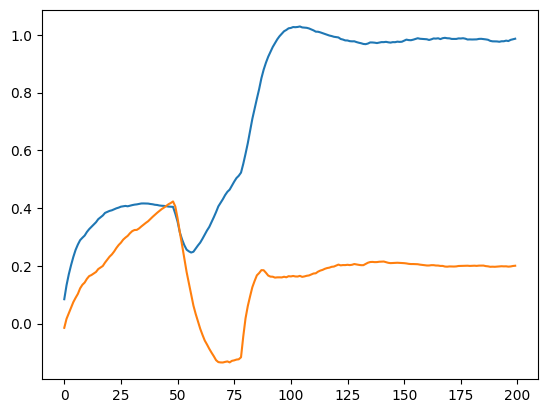

In [7]:
plt.plot(model_output[0])

In [8]:
model.destruct()